# Dog Vs cat classifier

In [2]:
#importing libraries 
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [3]:
#image properties
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [50]:
#datasetfor training
filenames=os.listdir("./train/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [169]:
#datasetfor test
filenames=os.listdir("./test/test")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

test_df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [170]:
test_df['category'].nunique()

1

In [8]:
#neural network
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [9]:
#analysing neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [10]:
#callbacks and learning rate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [87]:
#dataframe management 
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [173]:
test_df

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,0
4,10000.jpg,0
...,...,...
12495,9995.jpg,0
12496,9996.jpg,0
12497,9997.jpg,0
12498,9998.jpg,0


In [152]:
train_path = r'C:\Users\KIIT\Dropbox\My PC (BT1906126)\Desktop\python\Project\dogcat\train\train'
# valid_path = r'C:\Users\KIIT\Dropbox\My PC (BT1906126)\Desktop\python\Project\flowers\Flowers final\val'
test_path = r'C:\Users\KIIT\Dropbox\My PC (BT1906126)\Desktop\python\Project\dogcat\test'

In [177]:
#data generation
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./train/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator =  test_datagen.flow_from_directory(test_path, target_size = (*Image_Size, *Image_Size), class_mode = 'binary',
                                             batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [14]:
#training
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 1166s 811ms/step - loss: 0.9603 - accuracy: 0.5878 - val_loss: 0.7144 - val_accuracy: 0.6517
Epoch 2/10
1333/1333 [==============================] - 1059s 794ms/step - loss: 0.5691 - accuracy: 0.7130 - val_loss: 0.5035 - val_accuracy: 0.7489
Epoch 3/10
1333/1333 [==============================] - 887s 665ms/step - loss: 0.5119 - accuracy: 0.7516 - val_loss: 0.4402 - val_accuracy: 0.8076
Epoch 4/10
1333/1333 [==============================] - 893s 670ms/step - loss: 0.4729 - accuracy: 0.7784 - val_loss: 0.3975 - val_accuracy: 0.8234
Epoch 5/10
1333/1333 [==============================] - 919s 689ms/step - loss: 0.4386 - accuracy: 0.8021 - val_loss: 2.4253 - val_accuracy: 0.5419
Epoch 6/10
1333/1333 [==============================] - 945s 708ms/step - loss: 0.4169 - accuracy: 0.8114 - val_loss: 0.4432 - val_accuracy: 0.7862
Epoch 7/10
1333/1333 [==============================] - 937s 703ms/step - loss: 0.3993 - accuracy: 0.8229 - va

In [15]:
#saving model
model.save("model1_catdog_10epoch.h5")

In [155]:
#test data
test_filenames = os.listdir("./test/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

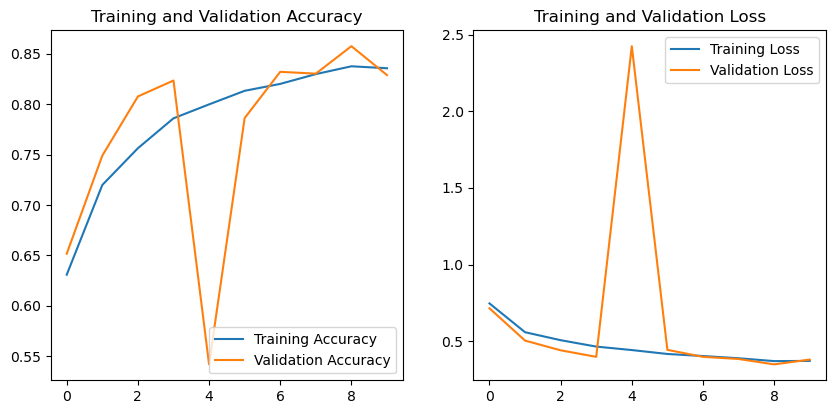

In [156]:
#visualization 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [223]:
model.evaluate(x=train_generator)

1334/1334 [==============================] - 239s 179ms/step - loss: 0.5447 - accuracy: 0.7444


[0.5447160005569458, 0.744350016117096]

In [150]:
test_df

,filename,category
0,1.jpg,0.0
1,10.jpg,0.0
2,100.jpg,0.0
3,1000.jpg,0.0
4,10000.jpg,0.0
...,...,...
12495,9995.jpg,0.0
12496,9996.jpg,0.0
12497,9997.jpg,0.0
12498,9998.jpg,0.0


In [215]:
#prediction
predict = model.predict_generator(train_generator, steps=np.ceil(nb_samples/batch_size))

In [109]:
predict = pd.DataFrame(predict)
predict

,0,1
0,0.061693,0.938307
1,0.619005,0.380995
2,0.488161,0.511839
3,0.150027,0.849973
4,0.936306,0.063694
...,...,...
12505,0.464802,0.535198
12506,0.069501,0.930499
12507,0.998011,0.001989
12508,0.373727,0.626273


In [115]:
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 1
for i in range(8):
    drop_indices = np.random.choice(predict.index, remove_n, replace=False)
    predict = predict.drop(drop_indices)

predict

,0,1
0,0.061693,0.938307
1,0.619005,0.380995
2,0.488161,0.511839
3,0.150027,0.849973
4,0.936306,0.063694
...,...,...
12505,0.464802,0.535198
12506,0.069501,0.930499
12507,0.998011,0.001989
12508,0.373727,0.626273


In [126]:
predict.drop([1],axis=1,inplace=True)
predict

,0
0,0.061693
1,0.619005
2,0.488161
3,0.150027
4,0.936306
...,...
12505,0.464802
12506,0.069501
12507,0.998011
12508,0.373727


In [127]:
#convertion of labels to categories
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [147]:
test_df

,filename,category
0,1.jpg,0.0
1,10.jpg,0.0
2,100.jpg,0.0
3,1000.jpg,0.0
4,10000.jpg,0.0
...,...,...
12495,9995.jpg,0.0
12496,9996.jpg,0.0
12497,9997.jpg,0.0
12498,9998.jpg,0.0


<Figure size 1200x2400 with 0 Axes>

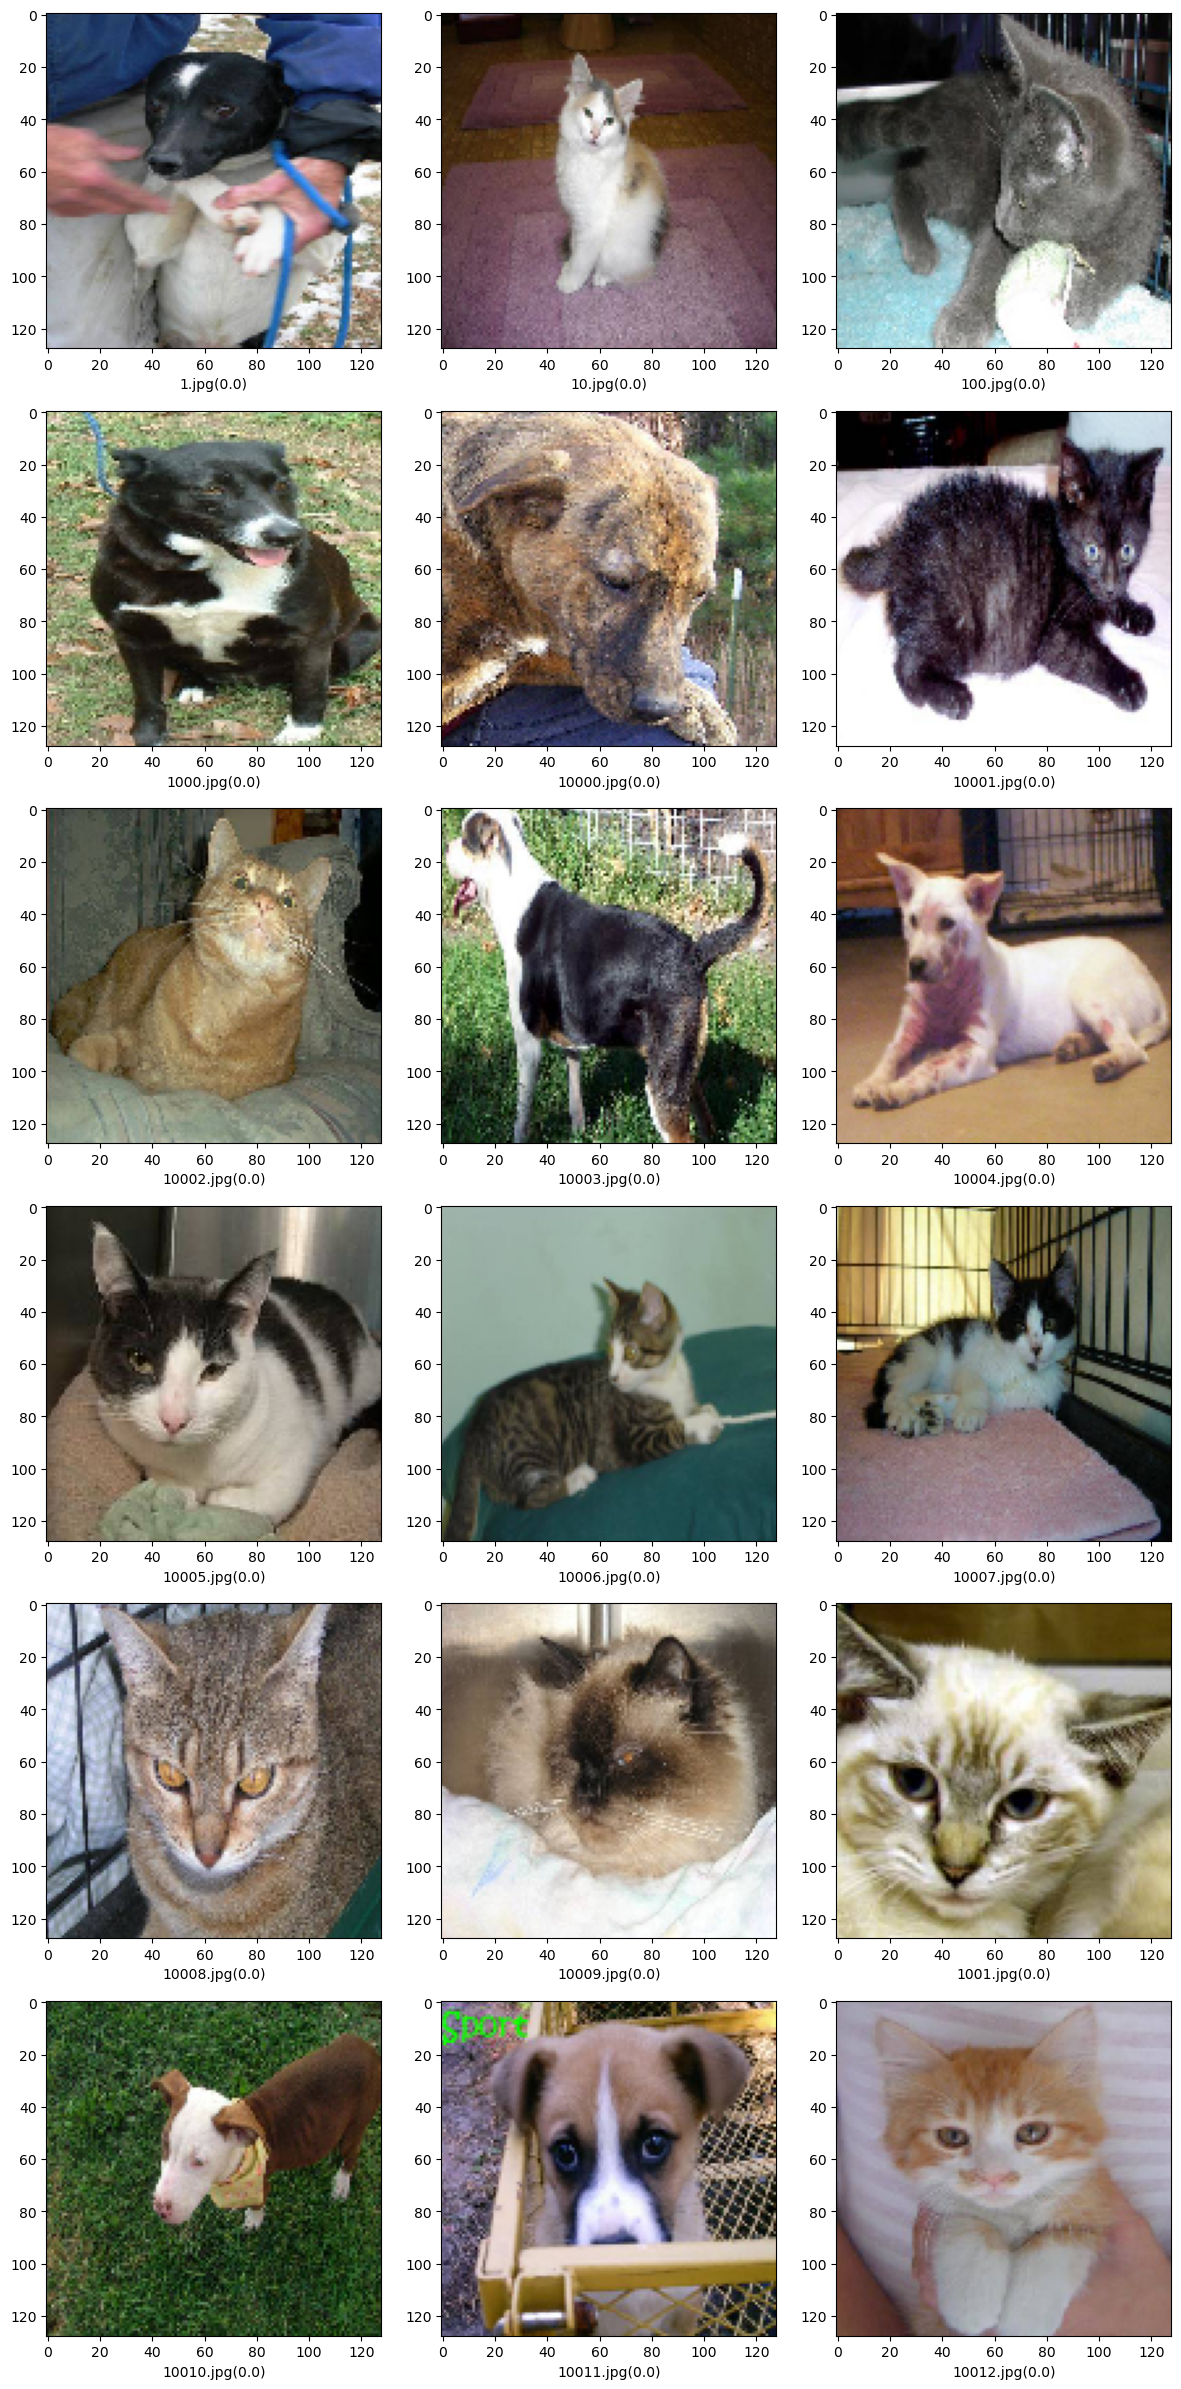

In [129]:
#predicted result
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test/test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [214]:
#testing in custom data
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("test/test/59.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

1 dog
